
MILESTONES 1

Nama  : Allen

Batch : FTDS_BSD-003

Dataset: Customer Shopping Trends 

Link_Dasboard: https://public.tableau.com/app/profile/ganung.nalendra.prakasa/viz/h8dsft_Milestone1_Allen/Dashboard1?publish=yes


## Identifikasi Masalah

Sebagai Data Analyst saya akan melakukan analisis terhadap dataset yang berjudul Customer Shopping Trends. Hal ini sangat dibutuhkan dan penting untuk menyesuaikan produk, strategi pemasaran, dan pengalaman pelanggan secara keseluruhan. Data analisis yang saya buat bisa berguna bagi pebisnis dan pengusaha untuk membuat keputusan yang tepat, mengoptimalkan penawaran produk, dan meningkatkan kepuasan pelanggan

## Objective

Objective: Objective dari project milestones kali ini akan berfokus pada:
1. Mengetahui jenis kategori dan item apa yang sering dibeli oleh customer berdasarkan kolom data yang sudah ditentukan kaitkan korelasinya dengan previous purchase dimana jenis kategori dan item apa yang dibeli berulangkali oleh customer yang bisa dijadikan bisnis strategi pagi para pebisnis

2. Ingin melihat manakah yang lebih konsumtif male or female dari data (terkait frekuensi pembelian) dan apakah gender mempengaruhi trend shopping pada produk tertentu

3. Bagaimana melihat pola pembelian trend customer shopping dari data luar negeri seperti apa berdasarkan perbedaan usia poinnya adalah usia berapakah masyarakat yang lebih melakukan shopping dengan menunjukkan deskriptif statistik dan kaitkan korelasinya dengan previous purchase

4. Apakah subscription, promo code, dan freeshipping menjadi beberapa faktor bagi para customer untuk melakukan transaksi belanja serta carilah statistik inferensial antara kolom usia dan subscription apakah terdapat perbedaan besar antara keduanya

5. Warna dan size apakah yang menjadi favorit pembelian bagi pola trend masyarakat luar negeri

6. Melihat rating yang diberikan kepada setiap kategori produk oleh kolom 'Gander'



In [2]:
#Import tool yang dapat membantu dalam analisis data kita
import time
import csv
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Meload dataset bentuk file csv 
df= pd.read_csv('shopping_trends.csv')

In [4]:
#Menampilkan 5 data teratas
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
#Melakukan eksplorasi berapa baris dan kolom yang kita punya
df.shape

(3900, 19)

In [6]:
#Menampilkan nilai unik pada setiap kolom data
df.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

In [7]:
# Menampilkan informasi tipe data dan melihat apakah terdapat missing value pada data yang kita akan analisis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.duplicated().sum()

0

In [9]:
#Melihat apakah ada data yang missing atau tidak
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [10]:
#Melihat rangkuman data meliputi penghitungan (Count,Mean,Standar Deviasi, dan juga data MIN dan MAX)
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Data Cleaning

In [11]:
# Penjabaran kolom apa saja yang kita punya
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [12]:
# Mengganti nama kolom yang memiliki 'spasi' menjadi '_' (underscore)
df.rename(columns={'Customer ID':'Customer_ID','Item Purchased':'Item_Purchased','Purchase Amount (USD)':'Purchase_Amount_USD','Review Rating':'Review_Rating','Subscription Status':'Subscription_Status','Payment Method':'Payment_Method','Shipping Type':'Shipping_Type','Discount Applied':'Discount_Applied','Promo Code Used':'Promo_Code_Used','Previous Purchases':'Previous_Purchases','Preferred Payment Method':'Preferred_Payment_Method','Frequency of Purchases':'Frequency_of_Purchases'}, inplace=True)
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
#Untuk memudahkan melihat tipe data kaitannya dengan mengganti tipe data object kedalam tipe data string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [14]:
#Mengganti semua kolom yang memiliki tipe data object ke tipe data string
df['Gender'] = df['Gender'].astype('string')
df['Item_Purchased'] = df['Item_Purchased'].astype('string')
df['Category'] = df['Category'].astype('string')
df['Location'] = df['Location'].astype('string')
df['Size'] = df['Size'].astype('string')
df['Color'] = df['Color'].astype('string')
df['Season'] = df['Season'].astype('string')
df['Subscription_Status'] = df['Subscription_Status'].astype('string')
df['Payment_Method'] = df['Payment_Method'].astype('string')
df['Shipping_Type'] = df['Shipping_Type'].astype('string')
df['Discount_Applied'] = df['Discount_Applied'].astype('string')
df['Promo_Code_Used'] = df['Promo_Code_Used'].astype('string')
df['Preferred_Payment_Method'] = df['Preferred_Payment_Method'].astype('string')
df['Frequency_of_Purchases'] = df['Frequency_of_Purchases'].astype('string')

print(df.dtypes)

Customer_ID                          int64
Age                                  int64
Gender                      string[python]
Item_Purchased              string[python]
Category                    string[python]
Purchase_Amount_USD                  int64
Location                    string[python]
Size                        string[python]
Color                       string[python]
Season                      string[python]
Review_Rating                      float64
Subscription_Status         string[python]
Payment_Method              string[python]
Shipping_Type               string[python]
Discount_Applied            string[python]
Promo_Code_Used             string[python]
Previous_Purchases                   int64
Preferred_Payment_Method    string[python]
Frequency_of_Purchases      string[python]
dtype: object


In [15]:
# mengahapus atau mengedrop kolom yang tidak diperlukan pada tahapan analisis
df.drop('Purchase_Amount_USD', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)
df.drop('Season', axis=1, inplace=True)
df.drop('Payment_Method', axis=1, inplace=True)
df.drop('Discount_Applied', axis=1, inplace=True)
df.drop('Preferred_Payment_Method', axis=1, inplace=True)
df.drop('Frequency_of_Purchases', axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          3900 non-null   int64  
 1   Age                  3900 non-null   int64  
 2   Gender               3900 non-null   string 
 3   Item_Purchased       3900 non-null   string 
 4   Category             3900 non-null   string 
 5   Size                 3900 non-null   string 
 6   Color                3900 non-null   string 
 7   Review_Rating        3900 non-null   float64
 8   Subscription_Status  3900 non-null   string 
 9   Shipping_Type        3900 non-null   string 
 10  Promo_Code_Used      3900 non-null   string 
 11  Previous_Purchases   3900 non-null   int64  
dtypes: float64(1), int64(3), string(8)
memory usage: 365.8 KB


In [16]:
#Untuk menampilkan 5 data teratas yang berisi hanya kolom-kolom yang akan membantu kita dalam menganalisis data sesuai objective yang telah ditentukan
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Size,Color,Review_Rating,Subscription_Status,Shipping_Type,Promo_Code_Used,Previous_Purchases
0,1,55,Male,Blouse,Clothing,L,Gray,3.1,Yes,Express,Yes,14
1,2,19,Male,Sweater,Clothing,L,Maroon,3.1,Yes,Express,Yes,2
2,3,50,Male,Jeans,Clothing,S,Maroon,3.1,Yes,Free Shipping,Yes,23
3,4,21,Male,Sandals,Footwear,M,Maroon,3.5,Yes,Next Day Air,Yes,49
4,5,45,Male,Blouse,Clothing,M,Turquoise,2.7,Yes,Free Shipping,Yes,31


Proses Data Exploration dan Cleaning telah selesai dan pada akhirnya kita memiliki 3900 baris dan menyisakan 12 kolom saja yang akan membantu kita dalam analisis data sekarang mari kita masuk pada tahap analisis data nya.

Setelah datanya sudah saya bersihkan maka saya akan mengexport data yang sudah bersih untuk kebutuhan dashboard

In [17]:
#Menyimpan Data Cleaning atau data yang sudah dibersihkan ke bentuk CSV
df.to_csv('Data_Cleaning_Milestones1.csv', index=False)
print('Data Saved')

Data Saved


# Data Analysist

### Category Item

In [18]:
#Untuk menghitung ada berapa banyak data 
df.Category.value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: Int64

In [19]:
#Untuk menampilkan modus atau data paling banyak muncul adalah clothing
df.Category.mode().values[0]

'Clothing'

Dari kedua data diatas kita mendapatkan informasi bahwa dari ke empat kategori Clothing, Accessories, Footwear, dan Outerwear customer trend atau tingkat frekuensi belanja customer paling banyak ke arah pembelian Clothing atau pakaian, maka mari kita buat visualisasinya dengan bantuan SeaBorn seperti di bawah ini

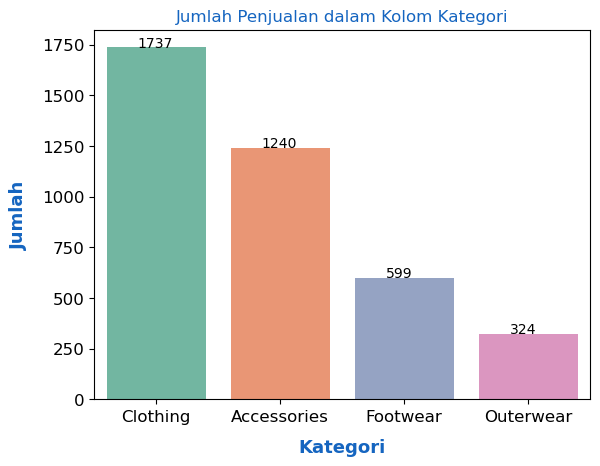

In [20]:
# Menulis ada apasaja pada kolom kategori dan menuliskan value counts setiap kategori
Category = {'Category': ['Clothing', 'Accessories', 'Footwear', 'Outerwear'],
'Jumlah': [1737, 1240, 599, 324]}

# Membuat bar plot menggunakan Seaborn dan mensetting warna,ukuran, dan menampilkan angka
ax = sns.barplot(data=Category, x='Category', y='Jumlah', palette='Set2')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x() + 0.25, i.get_height() + 1))
    ax.tick_params(axis = 'both', labelsize = 12)
plt.xlabel('Kategori', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.ylabel('Jumlah', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.title('Jumlah Produk dalam Setiap Kategori', weight = "bold", color = "#1565C0", fontsize = 18)

# Menambahkan judul pada plot
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Jumlah Penjualan dalam Kolom Kategori')

# Menampilkan plot
plt.show()

Dari visualisasi data kita sudah dapat melihat jelas bahwa trend shopping customer masyarakat luar negeri sangat banyak atau positif ke arah Clothing atau pakaian. Untuk memberikan insight yang lebih detail mari kita jabarkan produk-produk apa saja yang di beli oleh para customer berdasarkan ke empat kategori di atas dengan menggunakan function dibawah ini untuk lebih menjelaskan tentang objective nomer 1

In [21]:
# Untuk melihat nilai unik pada kolom item purchased
df.Item_Purchased.value_counts()

Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: Int64

Dari data di atas kita sudah dapat melihat terdapat banyak produk yang dibeli oleh masyarakat dan produk dengan pembelian yang menempati posisi tinggi ada blouse,pants,dan shirt yang masuk pada kategori Clothing dan ada jawelry pada posisi kedua yang masuk pada kategori Accessories. Mari kita buat visualisasi dari value count kolom item purchased untuk memudahkan kita dalam membaca data perbandingan setiap detail item menggunakan function di bawah ini

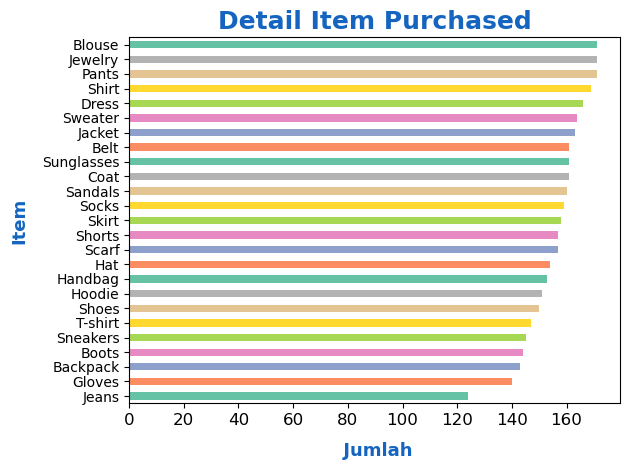

In [22]:
# Menulis ada apasaja pada kolom kategori dan menuliskan value counts setiap kategori
df["Item_Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('Set2'))

plt.xlabel('\n Jumlah', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = -5)
plt.ylabel('Item', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.title('Detail Item Purchased', weight = "bold", color = "#1565C0", fontsize = 18)

# Menampilkan plot
plt.xticks(rotation = 0, ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()

 pada data di atas kita dapat melihat Pola trend shopping masyarakat luar negeri berdasarkan data yang saya ambil mengarah positif pada trend Clothing dengan detail item 5 data ter-atas yang paling sering dibeli meliputi:
- Blouse sebanyak 171
- Jewelry sebanyak 171
- Pants sebanyak 171
- Shirt sebanyak 169
- Dress sebanyak 166
Dari 5 data teratas menunjukkan peringkat 1,3,4,dan 5 berasal dari kategori Clothing 

In [26]:
# Mellihat apakah ada pengulangan pembelian oleh customer
total_previous_purchases = df.groupby('Previous_Purchases')['Item_Purchased'].value_counts()
print("Total Previous Purchases:")
print(total_previous_purchases)

Total Previous Purchases:
Previous_Purchases  Item_Purchased
1                   Sweater           7
                    Jacket            7
                    Backpack          6
                    Coat              5
                    Hat               5
                                     ..
50                  Belt              2
                    Sandals           1
                    Sneakers          1
                    Skirt             1
                    Boots             1
Name: count, Length: 1197, dtype: int64


Dari beberapa detail item yang dibeli masyarakat ada beberapa pengulangan pembelian yang dilakukan customer. Berikut 5 data ter-atas yang menunjukkan produk apa yang mengalami pengulangan pembelian oleh masyarakat,
- Sweater sebanyak 7 kali
- Jacket sebanyak 7 kali
- Backpack sebanyak 6 kali
- Coat sebanyak 5 kali
- Hat sebanyak 5 kali

 Kesimpulan dari objective nomer 1 sebagai para pebisnis atau pengusaha melalui real data yang tersedia disarankan untuk mengekspansi usahanya ke arah industri Clothing atau konveksi dengan memperbanyak produk seperti 5 data teratas yang sering dibeli dan 5 data teratas yang mengalami pengulangan pembelian oleh masyarakat.

## Gender (Jenis Kelamin)

In [ ]:
#Untuk melihat ada berapa banyak pria dan wanita yang tersurvey pada data
df.Gender.value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: Int64

Dari data di atas kita mendapatkan informasi bahwa pada data yang di analisis ternyata pria memiliki lebih banyak transaksi shopping daripada wanita dimana apabila kita berbicara generalisasi melibatkan tingkat konsumerisme shopping individu berdasarkan kolom Category yang berisikan Clothing,Accessories,Footwear,dan Outerwear kita akan menganggap dan berspekulasi bahwa pasti wanitalah yang akan memiliki transaksi shopping lebih banyak daripada pria. Hal ini lah yang kita harus perhatikan pentingnya sebuah perusahaan atau pebisnis memiliki data analyst dalam timnya karena berbicara real data pada lapangan akan meningkatkan presentasi keberhasilan suatu strategi usaha atau bisnis lebih besar daripada hanya berspekulasi. Untuk dapat melihat perbandingan secara jelas mari buat visualisasinya dengan function di bawah ini

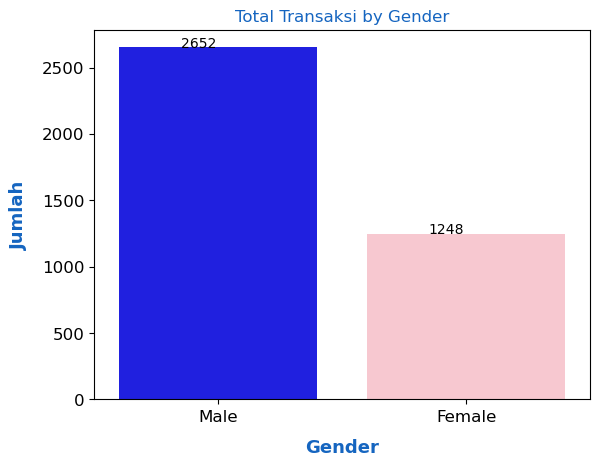

In [ ]:
# Menulis ada apasaja pada kolom Gender yaitu male dan female
Gender = {'Gender': ['Male','Female'],
'Jumlah': [2652, 1248]}

color_custom= ['Blue','Pink']
# Membuat bar plot menggunakan Seaborn dan mensetting warna,ukuran, dan menampilkan angka
ax = sns.barplot(data=Gender, x='Gender', y='Jumlah', palette= color_custom)
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x() + 0.25, i.get_height() + 1))
    ax.tick_params(axis = 'both', labelsize = 12)
plt.xlabel('Gender', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.ylabel('Jumlah', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.title('', weight = "bold", color = "#1565C0", fontsize = 18)

# Menambahkan judul pada plotTotal Transaksi by Gender
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.title('Total Transaksi by Gender')

# Menampilkan plot
plt.show()

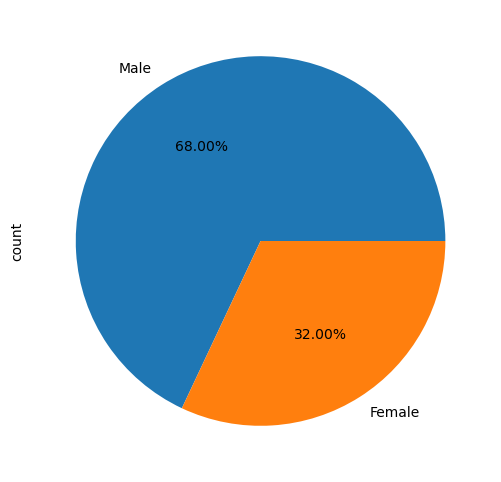

In [ ]:
#Menampilkan Pie Chart untuk menampilkan percentage dari Gender
fig,ax1 = plt.subplots(figsize=(6,6))

df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Pada data yang di analisis pria memiliki transaksi atau shopping lebih banyak daripada wanita dengan perbandingan 2652 atau 68% dibanding 1248 atau sekitar 32% yang dimana mematahkkan spekulasi atau dogma masyarakat dimana wanita dianggap memiliki tingkat konsumtif yang tinggi daripada pria. Analisisnya akan semakin terlihat jelas apabila kita melihat produk apa yang paling banyak di beli baik pria maupun wanita seperti analisis dibawah ini

In [ ]:
# Untuk mengetahui pembelian detail produk terbanyak yang dilakukan baik pria maupun wanita
total_purchase_by_gender = df.groupby('Gender')['Item_Purchased'].value_counts()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender  Item_Purchased
Female  Blouse             66
        Sandals            59
        Shirt              59
        Handbag            58
        Socks              58
        Sunglasses         56
        Belt               55
        Jacket             54
        Dress              52
        Jewelry            52
        Hat                52
        Hoodie             51
        Sweater            50
        Boots              50
        Skirt              49
        Shoes              48
        Shorts             48
        Pants              48
        Coat               47
        T-shirt            46
        Scarf              45
        Sneakers           42
        Gloves             37
        Backpack           37
        Jeans              29
Male    Pants             123
        Jewelry           119
        Sweater           114
        Coat              114
        Dress             114
        Scarf             112
        Shirt 

Dari data di atas kita dapat menjawab objecti kedua dan mengambil kesimpulan bahwa dari kolom gender, Disini kita akan mengambil 5 barang ter-atas yang sering dibeli baik wanita maupun pria. 
1. Untuk wanita 5 item ter-atas menurut data yang sering dibeli meliputi:
    - Blouse sebanyak 66 (Kategori Clothing)
    - Sandals sebanyak 59 (Kategori Footwear)
    - Shirt sebanyak 59 (Kategori Clothing)
    - Handbag sebanyak 58 (Kategori Accessories)
    - Socks sebanyak 56 (Kategori Footwear)

2. Untuk pria 5 item ter-atas menurut data yang sering dibeli meliputi:
    - Pants sebanyak 123 (Kategori Clothing)
    - Jawelry sebanyak 119 (Kategori Accessories)
    - Sweater sebanyak 114 (Kategori Clothing)
    - Coat sebanyak 114 (Kategori Clothing)
    - Dress sebanyak 144 (Kategori Cloting)

3. Kesimpulan terakhir adalah pada data yang di analisis pria memiliki transaksi atau shopping lebih banyak daripada wanita dengan perbandingan 68% dibanding 32% yang dimana mematahkkan spekulasi atau dogma masyarakat dimana wanita dianggap memiliki tingkat konsumtif yang tinggi daripada pria. Penjelasannya adalah karena pria sebagai kepala keluarga dimana biasanya sumber pendapatan terbesar terletak pada kepala keluarga sehingga semua transaksi jual-beli akan melaluinya hipotesis ini semakin diperkuat dengan data di atas yang menunjukkan bahwa pembelian 'skirt' atau 'rok' atau 'dress' yang merupakan kebutuhan wanita malah menjadi salah satu pembelian terbanyak yang dilakukan oleh pria. Hal ini dikarenakan faktor yang telah disebutkan sebelumnya sebagai kepala keluarga yang memilik sumber pendapatan terbanyak dalam sebuah rumah memungkinkan sebagian besar transaksi belanja ada padanya dengan kata lain kita bisa menyebutnya seorang ayah yang sedang mencukupi kebutuhan dan keinginan anak dan juga istrinya

4. Dalam pandangan bisnis ternyata perbedaan Gender tidak terlalu berpengaruh kepada trend shopping masyarakat pada detail produk tertentu dikarenakan faktor-faktor yang telah disebutkan pada point 3 dimana produk yang biasa digunakan wanita bisa saja juga dibeli oleh pria

## Age (Usia)

Pada tahapan ini kita menampilkan statistik deskriptif dari kolom Age dimana kita akan mencari Usia berapakah trend shopping pada masyarakat luar negeri paling banyak dilakukan, usia berapa yang paling muda dan tua yang melakukan transaksi belanja, dan berapakah median atau nilai tengah dari kolom umur. kita akan segera mengetahuinya dari function di bawah ini

### Statistik Deskriptif

In [ ]:
#Untuk menunjukkan nilai unik dari kolom usia
df.Age.value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [ ]:
#Untuk menghitung nilai minimum dari kolom Age
df.Age.min()

18

In [ ]:
#Untuk menghitung nilai maximum dari kolom Age
df.Age.max()

70

In [ ]:
#Untuk menghitung nilai median atau nilai tengah dari kolom Age
df.Age.median()

44.0

In [ ]:
#Untuk menghitung nilai modus atau yang sering muncul dari kolom Age
df.Age.mode().values[0]

69

In [ ]:
#Untuk menghitung nilai rata-rata dari kolom Age
df.Age.mean()

44.06846153846154

Dari data analisis di atas kita mendapatkan beberapa informasi yaitu:
1. Kita mendapatkan fakta bahwa modus dari data yang di analisis menunjukkan bahwa usia yang paling banyak melakukan transaksi pembelian adalah pada umur 69 

2. Diperoleh nilai tengah atau median dari data adalah pada umur 44 tahun 

Dari data di atas mari kita buat visualisasinya untuk memudahkan kita melihat persebaran atau distribusi dari kolom usia terkait shopping trend customer menggunakan function di bawah ini

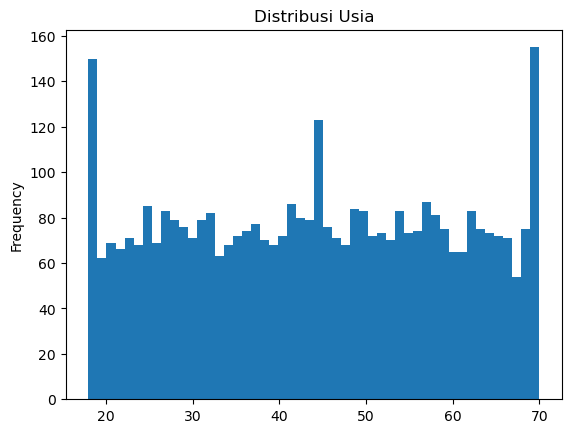

In [ ]:
#Visualisasi Distribusi kolom Age berupa histogram
df['Age'].plot(kind='hist', bins=50)
plt.title('Distribusi Usia')
plt.show()

Dari data visualisasi atau histogram distribusi data kolom usia di atas kita bisa mendapatkan insight baru bahwasannya nilai min yang berarti 18 tahun dan max yaitu usia 69 sampai 70 tahun dari kolom Age atau usia melakukan transaksi pembelian paling banyak dibandingkan dengan usia lain yang disusul dengan umur 40-50 tahun yang memiliki pembelian terbanyak pada pola trend shopping masyarakat luar negeri berdasarkan data yang saya analisis. Mari kita lihat detail barang apa yang sering di beli customer berdasarkan tingkatan umur menggunakan function di bawah ini

In [ ]:
# Mellihat produk dari ketegori apa saja yang dibeli setiap umur 
total_age_purchased = df.groupby('Age')['Category'].value_counts()
print("Total Age Purchased:")
print(total_age_purchased)

Total Age Purchased:
Age  Category   
18   Clothing       33
     Accessories    18
     Outerwear      10
     Footwear        8
19   Clothing       36
                    ..
69   Outerwear       5
70   Clothing       26
     Accessories    25
     Footwear       12
     Outerwear       4
Name: count, Length: 212, dtype: int64


In [ ]:
# Mellihat apakah ada pengulangan pembelian oleh customer
total_age_purchased = df.groupby('Age')['Item_Purchased'].value_counts()
print("Total Age Purchased:")
print(total_age_purchased)

Total Age Purchased:
Age  Item_Purchased
18   Shirt             6
     Jacket            5
     Dress             5
     Coat              5
     Socks             5
                      ..
70   Jacket            2
     Shirt             1
     Dress             1
     Jeans             1
     T-shirt           1
Name: count, Length: 1250, dtype: int64


Dari data analisis di atas kita mendapatkan beberapa kesimpulan dan bisa menjawab objective ketiga yaitu:
1. Kita mendapatkan fakta bahwa modus dari data yang di analisis menunjukkan bahwa usia yang paling banyak melakukan transaksi pembelian adalah pada umur 69 namun dengan menilik data visualisasi atau histogram distribusi data kolom usia kita bisa mendapatkan insight baru bahwasannya nilai min yang berarti 18 tahun dan max yaitu usia 69 sampai 70 tahun dari kolom Age atau usia melakukan transaksi pembelian paling banyak dibandingkan dengan usia lain dan kedua kategori umur tersebut memilik trend shopping ke arah kategori Clothing dan Accesories yang berada pada peringkat 1 dan 2 dari data pembelian terbanyak.

2. Kesimpulan data di atas adalah usia muda sekitar 18-19 tahun sangat banyak melakukan transaksi untuk kategori Clothing dengan 5 detail item teratas meliputi
    - Shirt sebanyak 6
    - Jacket sebanyak 5
    - Dress sebanyak 5
    - Coat sebanyak 5
    - Socks sebanyak 5
    
    Kesimpulan terakhir adalah usia muda sekitar 69-70 tahun sangat banyak melakukan transaksi untuk kategori Clothing dengan 5 detail item teratas meliputi
    - Jacket sebanyak 2
    - Shirt sebanyak 1
    - Dress sebanyak 1
    - Jeans sebanyak 1
    - T-shirt sebanyak 1



3. Terakhir data analisis membuktikan bahwa usia tidak mempengaruhi trend shopping customer karena semakin usia bertambah atau tua juga tetap melakukan transaksi pembelian sehingga faktor usia tidak mempengaruhi seseorang untuk tetap melakukan shopping

# Warna dan Ukuran

In [ ]:
#Untuk melihat nilai unik dari warna untuk dibuat visualisasinya
df.Color.value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Pink         153
Charcoal     153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: Int64

In [ ]:
#Untuk menampilkan warna teratas saja dari kolom Color untu dibuatkan data visualisasinya
df.Color.value_counts().head()

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: Int64

Pada data di atas kita sudah mendapatkan informasi bahwa trend customer shopping masyarakat luar negeri paling banyak membeli produk dengan warna Olive di peringkat pertama dan diikuti oleh warna Yellow,Silver,Teal, dan Green dari 4 macam kategori Clothing,Accesories,Footwear, dan Outerwear. 

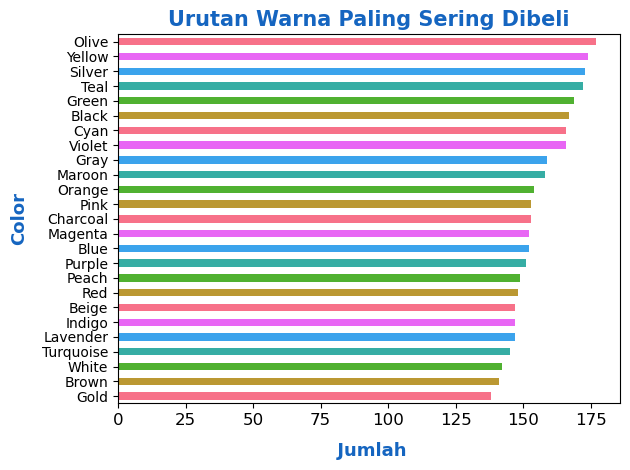

In [54]:
# Menulis ada apasaja pada kolom Color dengan menggunakan function value_counts
df["Color"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('husl'))

# Mensetting Ukuran Teks dan Warna
plt.xlabel('\n Jumlah', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = -5)
plt.ylabel('Color', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.title('Urutan Warna Paling Sering Dibeli', weight = "bold", color = "#1565C0", fontsize = 15)

# Menampilkan plot
plt.xticks(rotation = 0, ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()

Dari data visualisasi di atas kita mendapatkan informasi bahwa data yang paling laku terjual dari setiap detail produk adalah warna Olive di peringkat pertama dan diikuti oleh warna Yellow,Silver,Teal, dan Green. 

In [ ]:
#Untuk melihat nilai unik pada kolom ukuran atau size
df.Size.value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: Int64

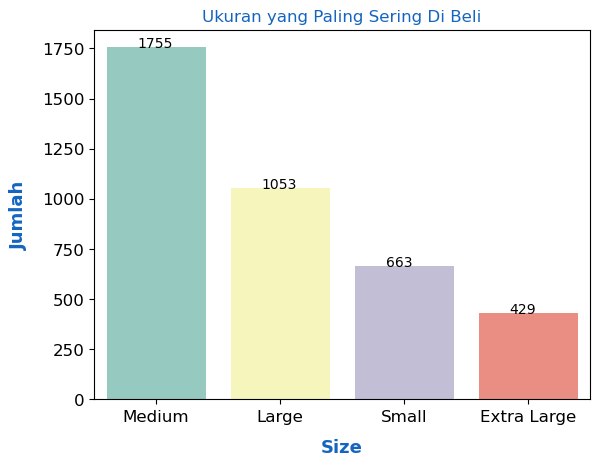

In [ ]:
# Menulis ada apasaja pada kolom Gender yaitu male dan female
Size = {'Size': ['Medium','Large','Small','Extra Large'],
'Jumlah': [1755, 1053,663,429]}

# Membuat bar plot menggunakan Seaborn dan mensetting warna,ukuran, dan menampilkan angka
ax = sns.barplot(data=Size, x='Size', y='Jumlah', palette= 'Set3')
for i in ax.patches:
    ax.annotate(int(i.get_height()), (i.get_x() + 0.25, i.get_height() + 1))
    ax.tick_params(axis = 'both', labelsize = 12)
plt.xlabel('Size', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.ylabel('Jumlah', weight = "bold", color = "#1565C0", fontsize = 13, labelpad = 10)
plt.title('', weight = "bold", color = "#1565C0", fontsize = 18)

# Menambahkan judul pada plotTotal Transaksi by Gender
plt.xlabel('Size')
plt.ylabel('Jumlah')
plt.title('Ukuran yang Paling Sering Di Beli')

# Menampilkan plot
plt.show()

Dari data diatas kita mendapatkan informasi bahwa trand shopping perihal ukuran yang paling banyak dibeli adalah ukuran Medium(M) dengan jumlah 1755 dan diikuti oleh ukuran Large(L) dengan jumlah 1053, Small(S) sebanyak 663, dan yang terakhir Extra Large(XL) sebanyak 429.

Untuk memberikan insight objective nomer 5 Dapat disimpulkan dari data di atas trend shopping customer luar negeri lebih menyukai pembelian detail produk warna Olive di peringkat pertama dan diikuti oleh warna Yellow,Silver,Teal, dan Green dengan ukuran Medium(M) dengan jumlah 1755 dan diikuti oleh ukuran Large(L) dengan jumlah 1053, Small(S) sebanyak 663, dan yang terakhir Extra Large(XL) sebanyak 429. Dalam analisis data ini dapat memberikan preferensi bagi para pebisnis di bidang konveksi untuk lebih mempertimbangkan komposisi produksi ukuran dan warna yang menjadi 5 data teratas

### Customer Subscription,Promo Code,dan Shipping Type

Pada tahapan kali ini mari kita lihat korelasi antara status keanggotaan customer dan penggunaan kode promo terhadap Freeshipping atau gratis ongkir

In [41]:
#Untuk melihat hubungan atau korelasi antara customer Subscription_Status,Promo_Code_Used dengan Shipping_Type
df.groupby(['Subscription_Status','Promo_Code_Used'])['Shipping_Type'].value_counts().reset_index()

,Subscription_Status,Promo_Code_Used,Shipping_Type,count
0,No,No,Free Shipping,397
1,No,No,2-Day Shipping,372
2,No,No,Standard,369
3,No,No,Express,367
4,No,No,Store Pickup,365
5,No,No,Next Day Air,353
6,No,Yes,Next Day Air,127
7,No,Yes,Standard,110
8,No,Yes,2-Day Shipping,102
9,No,Yes,Free Shipping,101


Dari data di atas kita dapat mengambil kesimpulan untuk memberikan insight kepada objective nomer 5 yaitu:
1. Subscription Status
- Sebagian besar pelanggan yang terdapat pada data tidak berlangganan karena mayoritas pada data di atas 'subscription_status' menunjukkan 'No' yang berarti tidak

2. Promo Code
- Jumlah transaksi yang menggunakan kode promo relatif lebih rendah dibandingkan tidak menggunakan kode promo perbandingan ini bisa dilihat dari tabel nomer 5 dan 6, untuk nomer 5 kode promo tidak dipakai namun tercatat ada 353 transaksi sedangkan nomer 6 kode promo dipakai tercatat hanya 127 transaksi 

3. Shipping Type
- Freeshipping menjadi pilihan alternatif utama bagi para customer diikuti oleh peringkat kedua dan ketiga yaitu 2-Day Shipping dan Standard

4. Korelasi Subscription Type dengan Promo Code
- Kebanyakan customer yang tidak berlangganan tidak menggunakan promo code 
- pada customer yang sudah berlangganan ada variasi dalam penggunaan promo namun sebagian besar masih tidak menggunakan kode promo

5. Korelasi Subscription Type dengan Shipping Type
- Sebagian besar customer yang tidak berlangganan memilih freeshipping sebagai jasa pengiriman barang
- sedangkan customer yang berlangganan memiliki variasi pemilihan jasa pengiriman

6. 5 poin diatas adalah kesimpulan dan insight dari objective nomer 5 yang outputnya apabila diperhatikan oleh para pebisnis dalam memahami pola preferensi pelanggan yang nantinya dapat digunakan sebagai pengambilan keputusan dalam strategi pemasaran, penyesuaian layanan, atau pengelolaan persediaan

### Statistik Inferential

Pada tahapan ini kita akan mencari apakah ada perbedaan yang signifikan antara Usia yang memiliki status berlangganan dengan usia yang tidak memiliki status berlangganan untuk sebuah trend shopping yang berkembang di masyarakat luar negeri

In [50]:
#Menghitung rata-rata antara umur yang berlangganan dan tidak berlangganan untuk di cari statistik inferensialnya menggunakan metode Anova

Subscribed = df['Age'][(df['Subscription_Status']=='Yes') | (df['Subscription_Status']=='Yes')]
Not_Subscribed = df['Age'][(df['Subscription_Status']=='No') | (df['Subscription_Status']=='No')]

print(f'Average Age Subscribe: {Subscribed.mean():.2f}')
print(f'Average Age Not Subscribe: {Not_Subscribed.mean():.2f}')


Average Age Subscribe: 44.23
Average Age Not Subscribe: 44.01


Dari data di atas mari kita tentukan variabel H0 dan H1 untuk mengetes apakah ada perbedaan signifikan antara kedua kolom tersebut kolom 'Age' dan 'Subscription_Status' dengan salah satu metode mencari statistik inferential yang disebut 'ANOVA'

H0: Tidak ada perbedaan yang signifikan antara usia yang memiliki status berlangganan dan tidak berlangganan

H1: Ada perbedaan yang signifikan antara usia yang berstatus berlanggan dan yang tidak berlangganan

In [51]:
res = stats.f_oneway(Subscribed, Not_Subscribed)
print('P-value:',res.pvalue)

P-value: 0.6852735321520766


Dikarenakan P-value melebihi 0,05 maka H0 diterima sehingga menghasilkan kesimpulan tidak ada perbedaan yang signifikan antara usia yang memiliki status berlangganan dan tidak berlangganan


## Rating

In [ ]:
# Untuk menghitung nilai unik kolom rating untuk dibuat visualisasinya
df.Review_Rating.value_counts()

Review_Rating
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: count, dtype: int64

In [ ]:
#Untuk melihat rating yang diberikan pria maupun wanita pada kategory produk
df.groupby(['Gender','Category'])['Review_Rating'].mean().reset_index()

,Gender,Category,Review_Rating
0,Female,Accessories,3.755612
1,Female,Clothing,3.704496
2,Female,Footwear,3.822111
3,Female,Outerwear,3.730693
4,Male,Accessories,3.774646
5,Male,Clothing,3.731922
6,Male,Footwear,3.775000
7,Male,Outerwear,3.754260


Dari data di atas kita dapat memberikan insight terhadap objective nomer 6 yaitu rating paling tinggi yang diberikan para customer adalah sebanyak 3,4% yang diartikan arah pemberian rating tidak bergerak terlalu positif karena masih jauh dari angkat 5 sebagai acuan rating sempurna atau kepuasan. Dari data rating oleh gender pada setiap kategori produk memberikan insight kepada para pebisnis untuk memperbaiki rating yang rendah untuk meningkatkan pembelian pada salah satu kategori produk. Hal ini dapat didukung oleh korelasi antara kolom 'Previous_Purchases' dan 'Review_Rating'dimana ketika rating produk bagus maka customer akan kembali membeli barang atau produk tersebut

### Statistik Deskriptif

In [ ]:
#Untuk membuktikan korelasi antara Previous_Purchases' dan 'Review_Rating'
corr_r, pval_p = stats.pearsonr(df['Previous_Purchases'], df['Review_Rating'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: 0.00, p-value: 0.791761660185139


Dikarenakan P Value lebih besar daripada 0,05 maka hubungan antara 2 variabel adalah benar sehingga saling keterkaitan sehingga ketika rating produk bagus maka customer akan kembali membeli barang atau produk tersebut